## 1. CompressSensing class

CompressSesing class provides tools to read wav signal, build periodic signal multi-frequency, compress it with random sampling and recovered it with L1-minimimazation solver

In [ ]:
import compress_sensing

#from importlib import reload
#reload(compress_sensing)

## 2. Periodic signal

### 2.1. Une seule fréquence

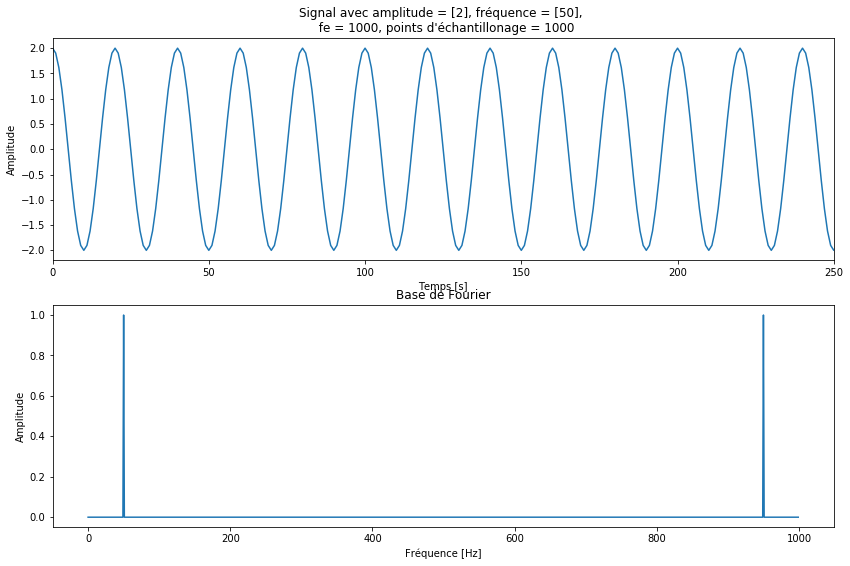

In [50]:
cs = compress_sensing.CompressSensing()
cos1 = cs.periodic_signal_maker(A0=[2], f0=[50], fe=1000, t=1, noise_level=0, plot=True)

In [51]:
instants_cos1, phi_cos1 = cos1.sampler_gauss()

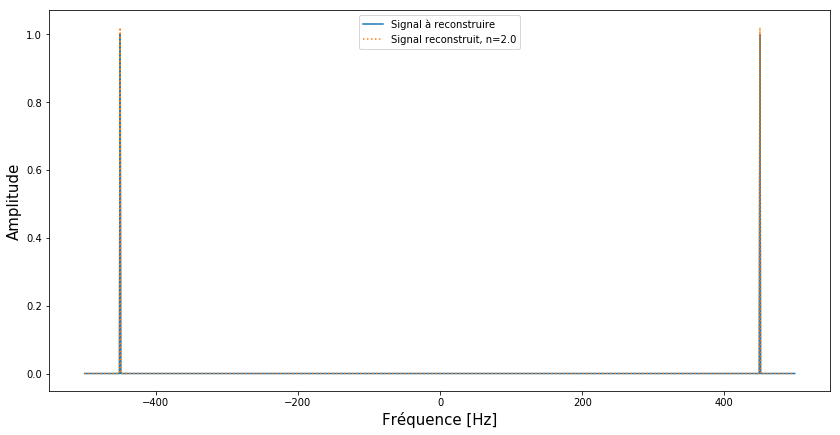

In [52]:
cos1.fft()
cos1_recovered, *_ = cos1.recover(instants_cos1, phi_cos1, w=10.475)
cos1.plot_score(cos1_recovered)

### 2.2. Signal périodique composé de 5 fréquences sans bruit

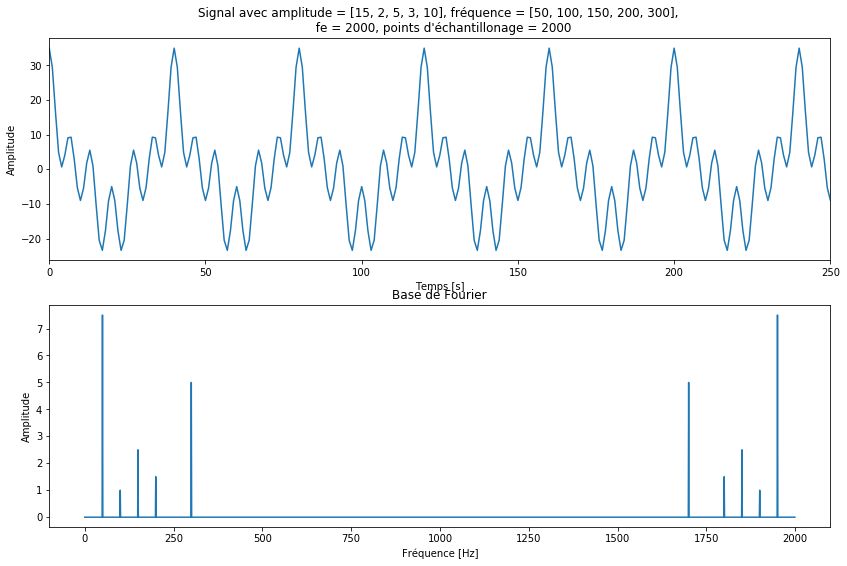

In [53]:
cs = compress_sensing.CompressSensing()

A = [15, 2, 5, 3, 10]
f = [50, 100, 150, 200, 300]

cos2 = cs.periodic_signal_maker(A0=A, f0=f, fe=2000, t=1, noise_level=0, plot=True)

In [54]:
instants_cos2, phi_cos2 = cos2.sampler_gauss()

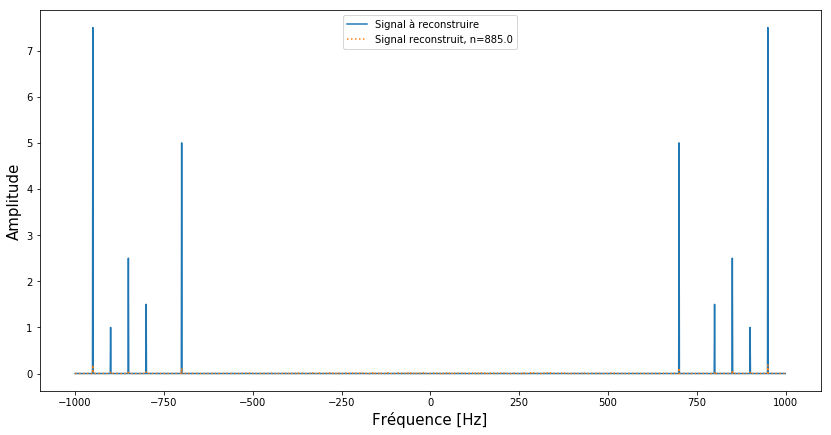

In [55]:
cos2.fft()
cos2_recovered, *_ = cos2.recover(instants_cos2, phi_cos2, w=10)
cos2.plot_score(cos2_recovered/len(cos2_recovered))

### 2.2. Signal périodique composé de 5 fréquences avec bruit

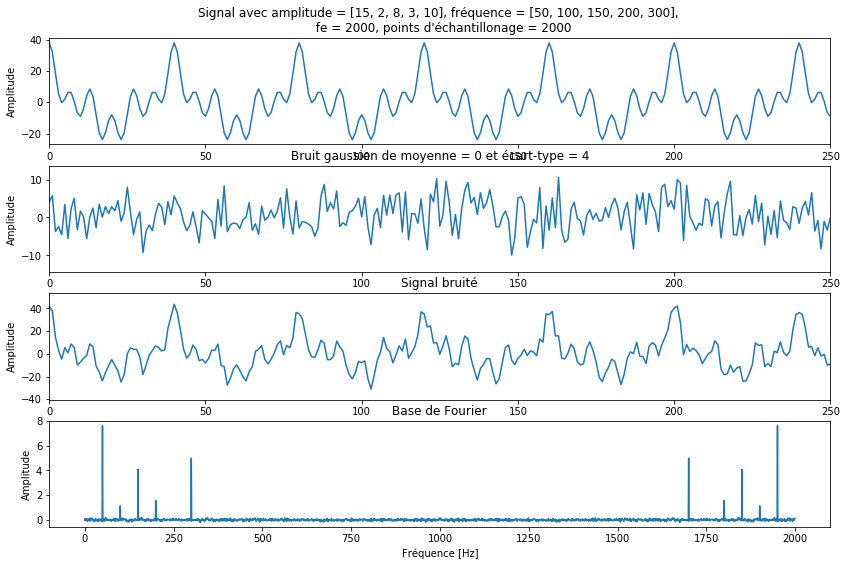

In [57]:
cs = CompressSensing()

A = [15, 2, 8, 3, 10]
f = [50, 100, 150, 200, 300]

cos3 = cs.periodic_signal_maker(A0=A, f0=f, fe=2000, t=1, noise_level=1, plot=True)

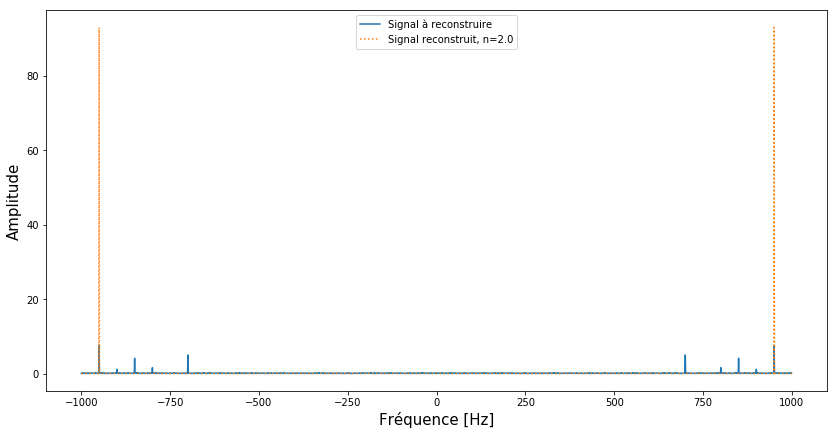

In [58]:
instants_cos3, phi_cos3 = cos3.sampler_gauss(rate=0.2)
cos3.fft()
cos3_recovered, *_ = cos3.recover(instants_cos3, phi_cos3, w=12.7)
cos3.plot_score(cos3_recovered)

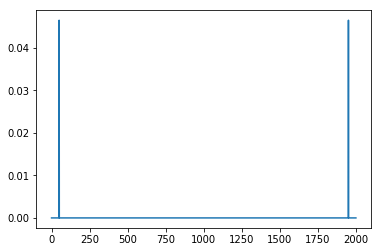

In [59]:
#len(cos3.signal_f)
plt.figure()
plt.plot(cos3_recovered/cos3.n_frames)


## 3.  Signal measured

In [60]:
cs = CompressSensing()
c01 = cs.wav_to_array('signals_wav/C_12.wav')

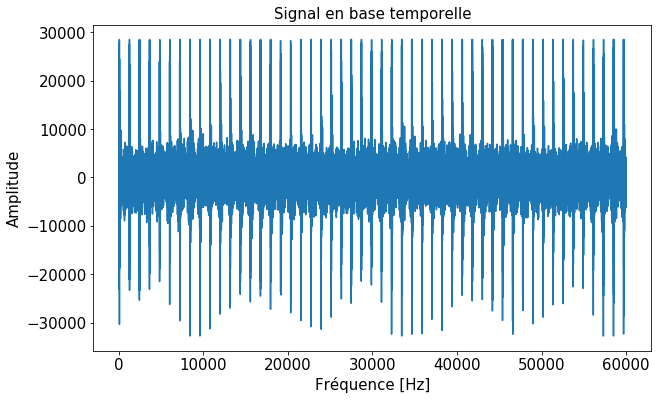

In [61]:
c01.plot_signal(basis='t')

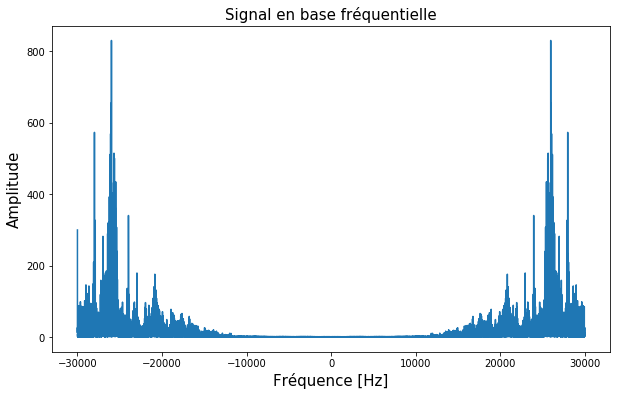

In [62]:
c01.fft()
c01.plot_signal(basis='f')

In [63]:
instants_c01, phi_c01 = c01.sampler_gauss(rate=0.2)

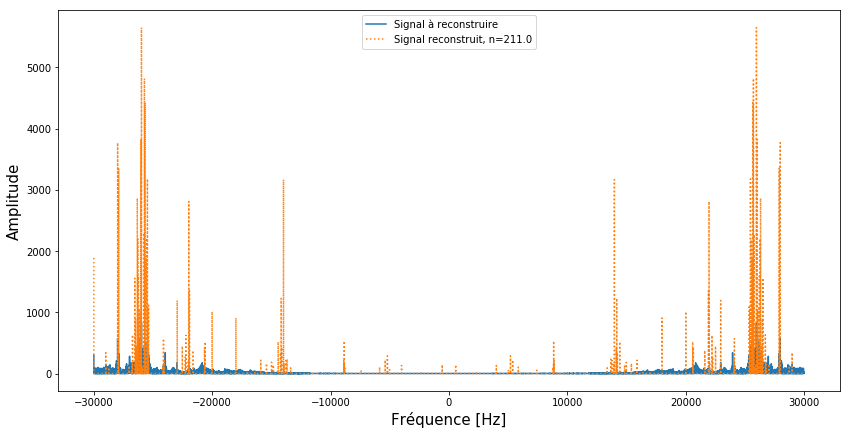

In [64]:
recovered_c01, obj_fct_c01, L1_c01 = c01.recover(sampling_instants=instants_c01, \
                                                                    phi=phi_c01, w=80, max_iter=30)

#c01.plot_recovery(recovered_c01, obj_fct_c01, L1_c01)
c01.plot_score(recovered_c01)

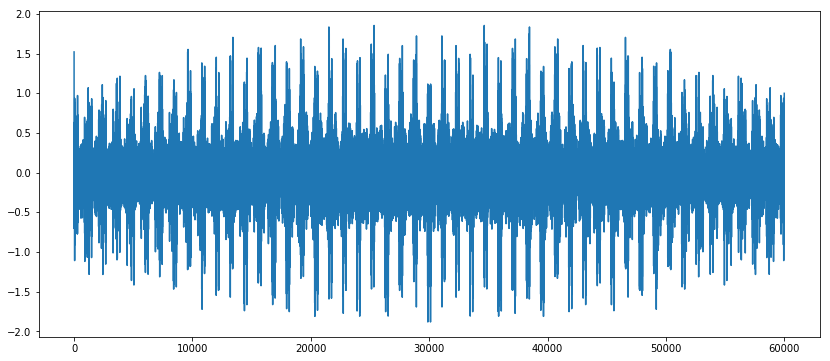

In [65]:
plt.figure(figsize=(14,6))
plt.plot(ifft(recovered_c01))